In [2]:
import numpy as np

import pandas as pd

import sklearn

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
        OneHotEncoder,
        OrdinalEncoder,
        StandardScaler,
        MinMaxScaler,
        PowerTransformer,
        FunctionTransformer,
        TargetEncoder
)

import feature_engine

from feature_engine.outliers import Winsorizer
from feature_engine.selection import SelectBySingleFeaturePerformance
from feature_engine.encoding import (
        RareLabelEncoder,
        MeanEncoder,
        CountFrequencyEncoder
)

import matplotlib.pyplot as plt

import warnings



## Display Settings

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
sklearn.set_config(transform_output='pandas')

In [6]:
warnings.filterwarnings('ignore')

## Read the Data

In [8]:
file_path = r'E:\Electirc Viechels\data\train.csv'

train = pd.read_csv(file_path)

train

,country,city,state,model_year,manufacturer,model,electric_type,clean_fuel_eligibility,vehicle_location,electric_range
0,Snohomish,Edmonds,Washington,1970,CHEVROLET,BOLT EUV,BEV,unknown,POINT (-122.3757836 47.800042),0
1,King,Kirkland,Washington,1970,NISSAN,ARIYA,BEV,unknown,POINT (-122.2026532 47.7210518),0
2,King,Kenmore,Washington,1970,TESLA,MODEL Y,BEV,unknown,POINT (-122.2478069 47.75817),0
3,King,Sammamish,Washington,1970,TESLA,MODEL S,BEV,eligible,POINT (-122.0181135 47.5880568),210
4,Pierce,Tacoma,Washington,1970,TESLA,MODEL Y,BEV,unknown,POINT (-122.48056 47.214139),0
...,...,...,...,...,...,...,...,...,...,...
122495,King,Seattle,Washington,1970,TESLA,MODEL S,BEV,eligible,POINT (-122.342434 47.736655),210
122496,King,Seattle,Washington,1970,BMW,X5,PHEV,eligible,POINT (-122.3173531 47.5484673),30
122497,Snohomish,Everett,Washington,1970,TESLA,MODEL Y,BEV,unknown,POINT (-122.2032349 47.8956271),0
122498,King,Kirkland,Washington,1970,TESLA,MODEL 3,BEV,unknown,POINT (-122.2026532 47.7210518),0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122500 entries, 0 to 122499
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   country                 122498 non-null  object
 1   city                    122498 non-null  object
 2   state                   122500 non-null  object
 3   model_year              122500 non-null  int64 
 4   manufacturer            122500 non-null  object
 5   model                   122500 non-null  object
 6   electric_type           122500 non-null  object
 7   clean_fuel_eligibility  122500 non-null  object
 8   vehicle_location        122495 non-null  object
 9   electric_range          122500 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 9.3+ MB


In [10]:
# Now we separte the input columns and taregt column
x_train = train.drop(columns='electric_range')
y_train = train.electric_range

## Transformation Operations

## country

In [13]:
x_train.country

0         Snohomish
1              King
2              King
3              King
4            Pierce
            ...    
122495         King
122496         King
122497    Snohomish
122498         King
122499         King
Name: country, Length: 122500, dtype: object

## city

In [15]:
x_train.city

0           Edmonds
1          Kirkland
2           Kenmore
3         Sammamish
4            Tacoma
            ...    
122495      Seattle
122496      Seattle
122497      Everett
122498     Kirkland
122499      Seattle
Name: city, Length: 122500, dtype: object

## state

In [17]:
x_train.state

0         Washington
1         Washington
2         Washington
3         Washington
4         Washington
             ...    
122495    Washington
122496    Washington
122497    Washington
122498    Washington
122499    Washington
Name: state, Length: 122500, dtype: object

In [18]:
# Now we combine the country,city and state column into arae and analyze together
area_subset = x_train.loc[:,['country','city','state']]
area_subset

,country,city,state
0,Snohomish,Edmonds,Washington
1,King,Kirkland,Washington
2,King,Kenmore,Washington
3,King,Sammamish,Washington
4,Pierce,Tacoma,Washington
...,...,...,...
122495,King,Seattle,Washington
122496,King,Seattle,Washington
122497,Snohomish,Everett,Washington
122498,King,Kirkland,Washington


In [19]:
area_pipeline = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('group',RareLabelEncoder(tol=0.2,replace_with='other',n_categories = 2)),
    ('encoder',MeanEncoder()),
    ('transformer',PowerTransformer())
])
area_pipeline.fit_transform(area_subset,y_train)

,country,city,state
0,7.069345e-14,2.842171e-14,0.0
1,-6.600276e-14,2.842171e-14,0.0
2,-6.600276e-14,2.842171e-14,0.0
3,-6.600276e-14,2.842171e-14,0.0
4,7.069345e-14,2.842171e-14,0.0
...,...,...,...
122495,-6.600276e-14,2.842171e-14,0.0
122496,-6.600276e-14,2.842171e-14,0.0
122497,7.069345e-14,2.842171e-14,0.0
122498,-6.600276e-14,2.842171e-14,0.0


In [20]:
area_pipeline = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('group',RareLabelEncoder(tol=0.2,replace_with='other',n_categories = 2)),
    ('encoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore')),
    # ('encoder',MeanEncoder()),
    ('transformer',PowerTransformer())
])
area_pipeline.fit_transform(area_subset)

,country_King,country_other,city_other,state_Washington,state_other
0,-1.034336,1.034336,0.0,0.046296,-0.046296
1,0.966804,-0.966804,0.0,0.046296,-0.046296
2,0.966804,-0.966804,0.0,0.046296,-0.046296
3,0.966804,-0.966804,0.0,0.046296,-0.046296
4,-1.034336,1.034336,0.0,0.046296,-0.046296
...,...,...,...,...,...
122495,0.966804,-0.966804,0.0,0.046296,-0.046296
122496,0.966804,-0.966804,0.0,0.046296,-0.046296
122497,-1.034336,1.034336,0.0,0.046296,-0.046296
122498,0.966804,-0.966804,0.0,0.046296,-0.046296


## model_year

In [22]:


class vehicle_age(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.current_year = 2024
        # if we want to take the year input from user the we write this following line of code
       # self.current_year = int(input('Enter the year'))
    def fit(self,X,y=None):
        return self

    def transform(self,X):
        X = X.copy()
        X['vehicle_age'] = self.current_year - X['model_year']
        X['model_decade'] = (X['model_year']//10)*10
        return X

In [23]:
model_year_pipeline = Pipeline(steps=[
    ('age',vehicle_age()),
    # ('scaler',PowerTransformer())
])
model_year_pipeline.fit_transform(x_train.loc[:,['model_year']])

,model_year,vehicle_age,model_decade
0,1970,54,1970
1,1970,54,1970
2,1970,54,1970
3,1970,54,1970
4,1970,54,1970
...,...,...,...
122495,1970,54,1970
122496,1970,54,1970
122497,1970,54,1970
122498,1970,54,1970


## manfacturer

In [25]:
x_train.manufacturer

0         CHEVROLET
1            NISSAN
2             TESLA
3             TESLA
4             TESLA
            ...    
122495        TESLA
122496          BMW
122497        TESLA
122498        TESLA
122499        TESLA
Name: manufacturer, Length: 122500, dtype: object

In [26]:
manufacturer_pipeline = Pipeline(steps=[
    ('grouper',RareLabelEncoder(tol=0.20,n_categories=2,replace_with='other')),
    ('encoder',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])
manufacturer_pipeline.fit_transform(x_train.loc[:,['manufacturer']])

,manufacturer_TESLA,manufacturer_other
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
122495,1.0,0.0
122496,0.0,1.0
122497,1.0,0.0
122498,1.0,0.0


## model

In [28]:
x_train.model

0         BOLT EUV
1            ARIYA
2          MODEL Y
3          MODEL S
4          MODEL Y
            ...   
122495     MODEL S
122496          X5
122497     MODEL Y
122498     MODEL 3
122499     MODEL Y
Name: model, Length: 122500, dtype: object

In [29]:
model_pipeline = Pipeline([
    ('group',RareLabelEncoder(tol=0.10,n_categories=2,replace_with='other')),
    ('encoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

model_pipeline.fit_transform(x_train.loc[:,['model']])

,model_MODEL 3,model_MODEL Y,model_other
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
122495,0.0,0.0,1.0
122496,0.0,0.0,1.0
122497,0.0,1.0,0.0
122498,1.0,0.0,0.0


## electric_type

In [31]:
x_train.electric_type

0          BEV
1          BEV
2          BEV
3          BEV
4          BEV
          ... 
122495     BEV
122496    PHEV
122497     BEV
122498     BEV
122499     BEV
Name: electric_type, Length: 122500, dtype: object

In [32]:
electric_type_pipeline = Pipeline(steps=[
    ('encoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

electric_type_pipeline.fit_transform(x_train.loc[:,['electric_type']])

,electric_type_BEV,electric_type_PHEV
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
122495,1.0,0.0
122496,0.0,1.0
122497,1.0,0.0
122498,1.0,0.0


## clean_fuel_eligibility

In [34]:
x_train.clean_fuel_eligibility

0          unknown
1          unknown
2          unknown
3         eligible
4          unknown
            ...   
122495    eligible
122496    eligible
122497     unknown
122498     unknown
122499     unknown
Name: clean_fuel_eligibility, Length: 122500, dtype: object

In [35]:
fuel_elegibility_pipieline = Pipeline(steps=[
    ('encoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

fuel_elegibility_pipieline.fit_transform(x_train.loc[:,['clean_fuel_eligibility']])

,clean_fuel_eligibility_eligible,clean_fuel_eligibility_not eligible,clean_fuel_eligibility_unknown
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
122495,1.0,0.0,0.0
122496,1.0,0.0,0.0
122497,0.0,0.0,1.0
122498,0.0,0.0,1.0


## vehicle_location

In [37]:
x_train.vehicle_location

0          POINT (-122.3757836 47.800042)
1         POINT (-122.2026532 47.7210518)
2           POINT (-122.2478069 47.75817)
3         POINT (-122.0181135 47.5880568)
4            POINT (-122.48056 47.214139)
                       ...               
122495      POINT (-122.342434 47.736655)
122496    POINT (-122.3173531 47.5484673)
122497    POINT (-122.2032349 47.8956271)
122498    POINT (-122.2026532 47.7210518)
122499    POINT (-122.3008235 47.6862671)
Name: vehicle_location, Length: 122500, dtype: object

In [38]:
class vehicle_location(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self

    def transform(self,X):
        X = X.copy()
        X[['longitude','latitude']] = X['vehicle_location'].apply(lambda ser : pd.Series(self.extract_cooardinates(ser)))
        return X.drop(columns=['vehicle_location'])

    @staticmethod

    def extract_cooardinates(points):
        point = points.replace('POINT (', '').replace(')', '')
        longitude,latitude = map(float,point.split())
        return longitude,latitude

In [39]:
location_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='POINT (0 0)')),
    ('location',vehicle_location()),
    ('scaler',StandardScaler())
])

location_pipeline.fit_transform(x_train.loc[:,['vehicle_location']])

,longitude,latitude
0,-0.181693,0.414472
1,-0.093025,0.324369
2,-0.116151,0.366709
3,0.001486,0.172663
4,-0.235354,-0.253861
...,...,...
122495,-0.164614,0.342167
122496,-0.151768,0.127504
122497,-0.093323,0.523505
122498,-0.093025,0.324369


## Column Transformer

In [41]:
column_transformer = ColumnTransformer(transformers=[
    ('area',area_pipeline,['country','city','state']),
    ('model_year',model_year_pipeline,['model_year']),
    ('company',manufacturer_pipeline,['manufacturer']),
    ('model',model_pipeline,['model']),
    ('electric_type',electric_type_pipeline,['electric_type']),
    ('fuel_eligibility',fuel_elegibility_pipieline,['clean_fuel_eligibility']),
    ('location',location_pipeline,['vehicle_location'])
],remainder='passthrough')

In [42]:
column_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('area',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('group',
                                                  RareLabelEncoder(n_categories=2,
                                                                   replace_with='other',
                                                                   tol=0.2)),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('transformer',
                                                  PowerTransformer())]),
                                 ['country', 'city', 'state']),
                                ('model_yea...
                                                                sparse_output=False))]),
                                 ['electric_type']),
                                ('fuel_eligibility',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['clean_fuel_eligibility']),
                                ('location',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='POINT '
                                                                           '(0 '
                                                                           '0)',
                                                                strategy='constant')),
                                                 ('location',
                                                  vehicle_location()),
                                                 ('scaler', StandardScaler())]),
                                 ['vehicle_location'])])

In [43]:
df_transformed = column_transformer.fit_transform(x_train, y_train)
df_transformed 

,area__country_King,area__country_other,area__city_other,area__state_Washington,area__state_other,model_year__model_year,model_year__vehicle_age,model_year__model_decade,company__manufacturer_TESLA,company__manufacturer_other,model__model_MODEL 3,model__model_MODEL Y,model__model_other,electric_type__electric_type_BEV,electric_type__electric_type_PHEV,fuel_eligibility__clean_fuel_eligibility_eligible,fuel_eligibility__clean_fuel_eligibility_not eligible,fuel_eligibility__clean_fuel_eligibility_unknown,location__longitude,location__latitude
0,-1.034336,1.034336,0.0,0.046296,-0.046296,1970,54,1970,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.181693,0.414472
1,0.966804,-0.966804,0.0,0.046296,-0.046296,1970,54,1970,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.093025,0.324369
2,0.966804,-0.966804,0.0,0.046296,-0.046296,1970,54,1970,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.116151,0.366709
3,0.966804,-0.966804,0.0,0.046296,-0.046296,1970,54,1970,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.001486,0.172663
4,-1.034336,1.034336,0.0,0.046296,-0.046296,1970,54,1970,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.235354,-0.253861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122495,0.966804,-0.966804,0.0,0.046296,-0.046296,1970,54,1970,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.164614,0.342167
122496,0.966804,-0.966804,0.0,0.046296,-0.046296,1970,54,1970,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.151768,0.127504
122497,-1.034336,1.034336,0.0,0.046296,-0.046296,1970,54,1970,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.093323,0.523505
122498,0.966804,-0.966804,0.0,0.046296,-0.046296,1970,54,1970,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.093025,0.324369


## Feature Selection

In [45]:
estimator = RandomForestRegressor(n_estimators=10,max_depth=3,random_state=42)

selector = SelectBySingleFeaturePerformance(
    estimator=estimator,
    scoring='r2',
    threshold=0.1
)


## Putting it Altogether

In [47]:
preprocessor = Pipeline(steps=[
    ('ct',column_transformer),
    ('selector',selector)
])

preprocessor.fit_transform(x_train,y_train)

,fuel_eligibility__clean_fuel_eligibility_eligible,fuel_eligibility__clean_fuel_eligibility_unknown
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
122495,1.0,0.0
122496,1.0,0.0
122497,0.0,1.0
122498,0.0,1.0


In [48]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=10)))
])
pipeline.fit_transform(x_train,y_train)

,fuel_eligibility__clean_fuel_eligibility_unknown
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
122495,0.0
122496,0.0
122497,1.0
122498,1.0


## Visulization

In [50]:
feature_performance = preprocessor.named_steps['selector'].feature_performance_

feature_performance

{'area__country_King': 1.7040369546935292e-05,
 'area__country_other': 1.7040369546935292e-05,
 'area__city_other': -8.420643822078707e-06,
 'area__state_Washington': 7.878962715409295e-05,
 'area__state_other': 7.878962715409295e-05,
 'model_year__model_year': -8.420643822078707e-06,
 'model_year__vehicle_age': -8.420643822078707e-06,
 'model_year__model_decade': -8.420643822078707e-06,
 'company__manufacturer_TESLA': 0.029792379694984123,
 'company__manufacturer_other': 0.029792379694984123,
 'model__model_MODEL 3': 0.06228213173101874,
 'model__model_MODEL Y': 0.0457186565856433,
 'model__model_other': 7.284065194131568e-05,
 'electric_type__electric_type_BEV': 0.020929453841142198,
 'electric_type__electric_type_PHEV': 0.020929453841142198,
 'fuel_eligibility__clean_fuel_eligibility_eligible': 0.5995239546570086,
 'fuel_eligibility__clean_fuel_eligibility_not eligible': 0.018497579211160797,
 'fuel_eligibility__clean_fuel_eligibility_unknown': 0.43642573530393375,
 'location__longi

In [51]:
sorted_feat_imp = dict(sorted(feature_performance.items(), key=lambda val: val[1]))
sorted_feat_imp

{'area__city_other': -8.420643822078707e-06,
 'model_year__model_year': -8.420643822078707e-06,
 'model_year__vehicle_age': -8.420643822078707e-06,
 'model_year__model_decade': -8.420643822078707e-06,
 'area__country_King': 1.7040369546935292e-05,
 'area__country_other': 1.7040369546935292e-05,
 'model__model_other': 7.284065194131568e-05,
 'area__state_Washington': 7.878962715409295e-05,
 'area__state_other': 7.878962715409295e-05,
 'location__longitude': 0.002337009681108134,
 'location__latitude': 0.003712929012510302,
 'fuel_eligibility__clean_fuel_eligibility_not eligible': 0.018497579211160797,
 'electric_type__electric_type_BEV': 0.020929453841142198,
 'electric_type__electric_type_PHEV': 0.020929453841142198,
 'company__manufacturer_TESLA': 0.029792379694984123,
 'company__manufacturer_other': 0.029792379694984123,
 'model__model_MODEL Y': 0.0457186565856433,
 'model__model_MODEL 3': 0.06228213173101874,
 'fuel_eligibility__clean_fuel_eligibility_unknown': 0.43642573530393375,


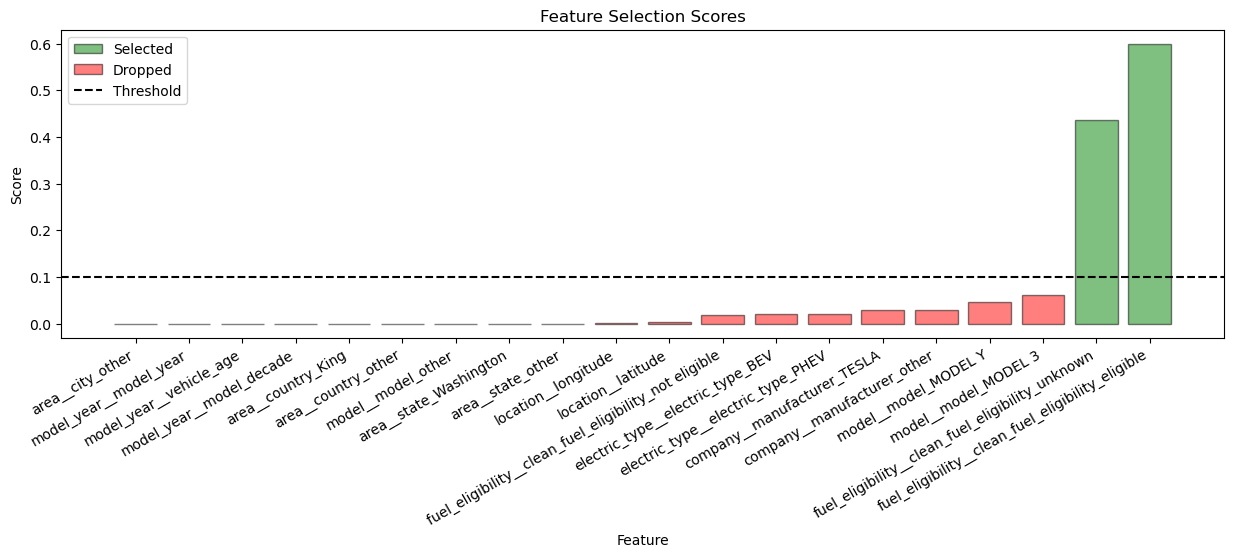

In [52]:
THRESHOLD = 0.1

selected_bar = None
dropped_bar = None
colors = ["red" if score < THRESHOLD else "green" for score in sorted_feat_imp.values()]


fig, ax = plt.subplots(figsize=(15, 4)) 

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
	params = dict(
		x=i,
		height=score,
		edgecolor="black",
		alpha=0.5
	)
	
	if score < THRESHOLD:
		bar = ax.bar(
			color="red",
			**params
		)
		if not dropped_bar:
			dropped_bar = bar[0]
	else:
		bar = ax.bar(
			color="green",
			**params
		)
		if not selected_bar:
			selected_bar = bar[0]

thresh_line = ax.axhline(
	y=0.1,
	color="black",
	linestyle="--"
)

ax.set_xticks(
	ticks=range(len(sorted_feat_imp)),
	labels=list(sorted_feat_imp.keys()),
	rotation=30,
	ha="right"
)

ax.set(
	xlabel="Feature",
	ylabel="Score",
	title="Feature Selection Scores"
)

ax.legend(
	handles=[selected_bar, dropped_bar, thresh_line],
	labels=["Selected", "Dropped", "Threshold"],
	loc="upper left"
)

plt.show()